# Gathering Real-time GTFS Data

Importing stop data from LA Metro and Santa Monica Big Blue Bus and constraining to the Palisades and Sunset evacuation zones.

In [1]:
import pandas as pd
metrostops = pd.read_csv('stops.txt')
metrostops.head()

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,stop_url,location_type,parent_station,tpis_name
0,1,1,Paramount / Slauson,NaN,33.973248,-118.113113,NaN,NaN,NaN,NaN
1,3,3,Jefferson / 10th,NaN,34.025471,-118.328402,NaN,NaN,NaN,NaN
2,6,6,120th / Augustus F Hawkins,NaN,33.924696,-118.242222,NaN,NaN,NaN,NaN
3,7,7,120th / Martin Luther King Hospital,NaN,33.924505,-118.240369,NaN,NaN,NaN,NaN
4,12,12,15054 Sherman Way,NaN,34.201075,-118.461953,NaN,NaN,NaN,NaN


In [2]:
import geopandas as gpd
metrostopsGdf = gpd.GeoDataFrame(metrostops,geometry = gpd.points_from_xy(metrostops.stop_lon,metrostops.stop_lat),crs='EPSG:4326')

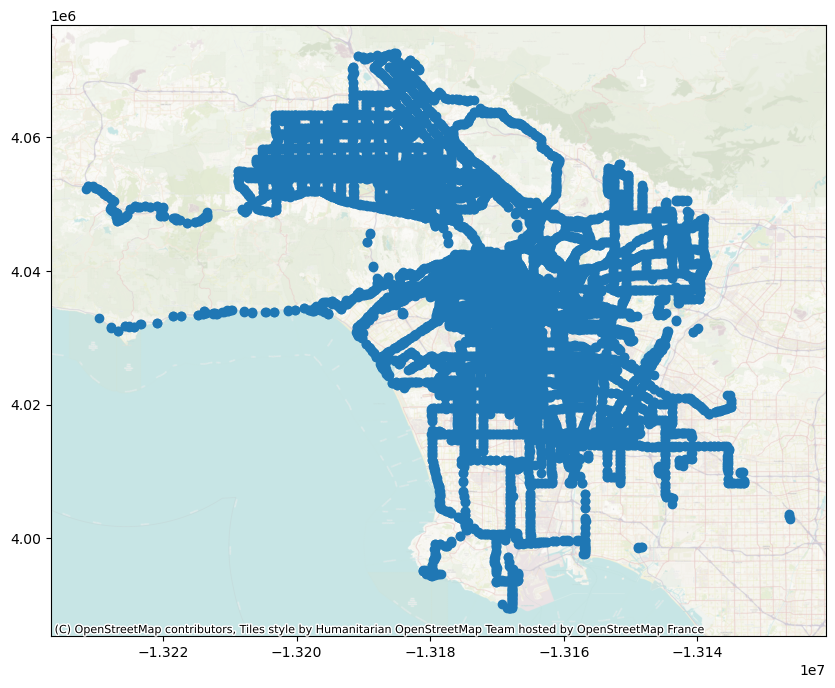

In [3]:
import matplotlib.pyplot as plt
import contextily as ctx
fig, ax = plt.subplots(figsize=(10,10))
metrostopsGdf.to_crs('EPSG:3857').plot(ax=ax)
ctx.add_basemap(ax=ax, alpha=0.5, zoom=13)

In [4]:
pal_perim = gpd.read_file('Palisades_Perimeter_20250121 (1).zip')
pal_perim.head()

,OBJECTID,type,Shape__Are,Shape__Len,geometry
0,1,Heat Perimeter,1182.082031,267.101144,"POLYGON ((-13193543.302 4032913.077, -13193543..."
1,2,Heat Perimeter,2222.488281,185.498783,"POLYGON ((-13193524.155 4033067.953, -13193524..."
2,3,Heat Perimeter,21.011719,22.412814,"POLYGON ((-13193598.085 4033158.222, -13193598..."
3,4,Heat Perimeter,214.992188,76.639180,"POLYGON ((-13193654.249 4033146.033, -13193656..."
4,5,Heat Perimeter,44203.453125,1569.259764,"POLYGON ((-13194209.58 4033236.32, -13194209.5..."


In [5]:
fire_perim = gpd.read_file('CalFire_Perimeters_(NIFC_FIRIS)_Public_View_-_Fire_Extent_Layer.zip')
fire_perim.head()

,OBJECTID,GlobalID,type,source,poly_DateC,mission,incident_n,incident_1,area_acres,descriptio,FireDiscov,CreationDa,EditDate,displaySta,geometry
0,1272,feb591e5-3665-47a4-b745-5787b15b5c84,Heat Perimeter,FIRIS,2025-01-09,CA-LFD-SUNSET-N40Y,None,None,42.770648,FIRIS Perimeter,None,2025-01-09,None,Inactive,"MULTIPOLYGON (((-13175150.092 4043017.506, -13..."
1,1278,6fce1f7a-133e-4533-939d-2d3f9fe03638,Heat Perimeter,CAL FIRE INTEL FLIGHT DATA,2025-01-09,HURST,HURST,None,831.390000,Mixed Methods,None,NaT,None,Inactive,"POLYGON ((-13187991.688 4073306.403, -13187979..."
2,1283,c39f3bf1-3f11-4357-9e52-208e03ec1087,Heat Perimeter,FIRIS,2025-01-10,CA-VNC-KENNETH-N40Y,None,None,959.722647,FIRIS Perimeter,None,2025-01-10,None,Inactive,"POLYGON ((-13210359.26 4052562.79, -13210424.2..."
3,1289,b4d14153-fb41-4e5e-8be6-4d910df154b6,Heat Perimeter,FIRIS,2025-01-11,CA-LFD-EATON-N40Y,None,None,13993.151114,FIRIS Perimeter,None,2025-01-11,None,Inactive,"MULTIPOLYGON (((-13144941.88 4060759.987, -131..."
4,1290,77e24e42-336b-4743-8a60-ae9b5cb26aa1,Heat Perimeter,FIRIS,2025-01-11,CA-LFD-PALISADES-N40Y,None,None,22660.483014,FIRIS Perimeter,None,2025-01-11,None,Inactive,"MULTIPOLYGON (((-13192092.266 4044573.796, -13..."


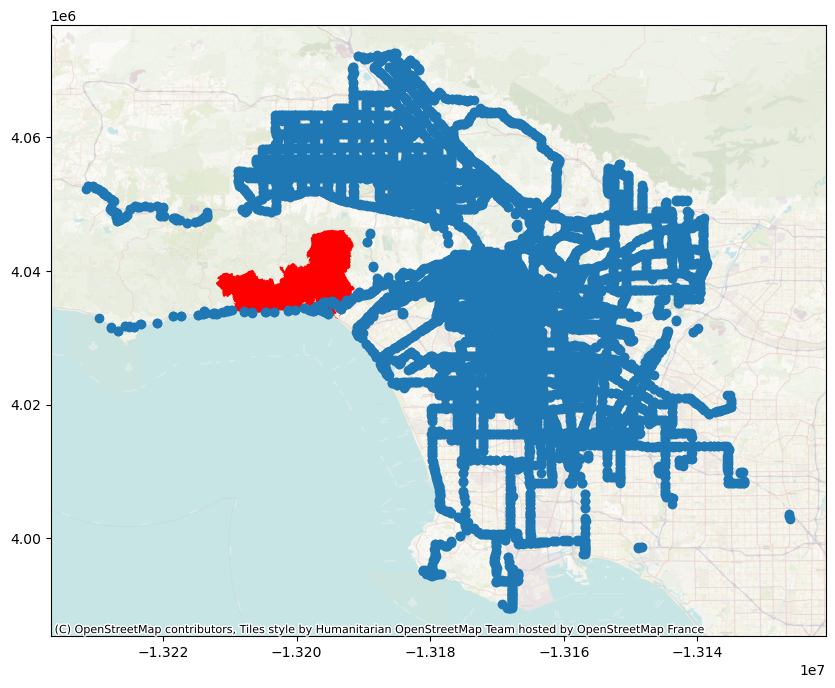

In [6]:
import matplotlib.pyplot as plt
import contextily as ctx
fig, ax = plt.subplots(figsize=(10,10))
pal_perim.to_crs('EPSG:3857').plot(color='r',ax=ax)
metrostopsGdf.to_crs('EPSG:3857').plot(ax=ax)
ctx.add_basemap(ax=ax, alpha=0.5, zoom=13)

Maximum Intent Evacuation Zones

In [7]:
evac_zones = gpd.read_file('Data/Maximum Extent Evacuation Zones.shp')
evac_zones.head()

,zoneId,country_ab,state_abbr,county_abb,city_abbr,zone_seque,city_zone_,incident_n,most_extre,Shape__Are,Shape__Len,geometry
0,US-CA-XLA-LAC-E119,US,CA,XLA,LAC,E119,LAC-E119,HURST,Evacuation Order,4.126499e+08,113231.522052,"POLYGON ((6435615.007 1958853.548, 6435583.257..."
1,US-CA-XLA-SCL-RANCH,US,CA,XLA,SCL,RANCH,SCL-RANCH,HURST,Evacuation Warning,7.208630e+07,43886.728092,"POLYGON ((6411696.4 1954312.647, 6411480.18 19..."
2,US-CA-XLA-LOS-Q1116,US,CA,XLA,LOS,Q1116,LOS-Q1116,PALISADES,Evacuation Order,8.429632e+06,19035.910336,"POLYGON ((6390582.747 1849757.499, 6390486.198..."
3,US-CA-XLA-CAL-C407,US,CA,XLA,CAL,C407,CAL-C407,PALISADES,Evacuation Warning,3.845958e+07,34610.842732,"POLYGON ((6364969.561 1871318.131, 6364968.381..."
4,US-CA-XLA-SDP-U029,US,CA,XLA,SDP,U029,SDP-U029,PALISADES,Evacuation Order,1.080486e+08,79915.287395,"POLYGON ((6354282.802 1849455.576, 6354323.715..."


In [8]:
#evac_zones = evac_zones[evac_zones['incident_n' == 'EATON'or'incident_n'=='PALISADES' or 'incident_n'=='SUNSET']]
evac_zones = evac_zones[(evac_zones['incident_n'] == 'EATON') | (evac_zones['incident_n'] == 'PALISADES')|(evac_zones['incident_n'] == 'SUNSET')]
evac_zones.head()

,zoneId,country_ab,state_abbr,county_abb,city_abbr,zone_seque,city_zone_,incident_n,most_extre,Shape__Are,Shape__Len,geometry
2,US-CA-XLA-LOS-Q1116,US,CA,XLA,LOS,Q1116,LOS-Q1116,PALISADES,Evacuation Order,8.429632e+06,19035.910336,"POLYGON ((6390582.747 1849757.499, 6390486.198..."
3,US-CA-XLA-CAL-C407,US,CA,XLA,CAL,C407,CAL-C407,PALISADES,Evacuation Warning,3.845958e+07,34610.842732,"POLYGON ((6364969.561 1871318.131, 6364968.381..."
4,US-CA-XLA-SDP-U029,US,CA,XLA,SDP,U029,SDP-U029,PALISADES,Evacuation Order,1.080486e+08,79915.287395,"POLYGON ((6354282.802 1849455.576, 6354323.715..."
6,US-CA-XLA-LCF-MEMORIAL,US,CA,XLA,LCF,MEMORIAL,LCF-MEMORIAL,EATON,Evacuation Order,6.725536e+06,10256.712422,"POLYGON ((6499364.348 1897819.608, 6499299.425..."
7,US-CA-XLA-LCF-INVERNESS,US,CA,XLA,LCF,INVERNESS,LCF-INVERNESS,EATON,Evacuation Order,1.365870e+07,18009.132944,"POLYGON ((6504541.613 1887166.887, 6504454.983..."


In [9]:
evac_zones.crs

<Projected CRS: EPSG:2229>
Name: NAD83 / California zone 5 (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - California - counties Kern; Los Angeles; San Bernardino; San Luis Obispo; Santa Barbara; Ventura.
- bounds: (-121.42, 32.76, -114.12, 35.81)
Coordinate Operation:
- name: SPCS83 California zone 5 (US survey foot)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

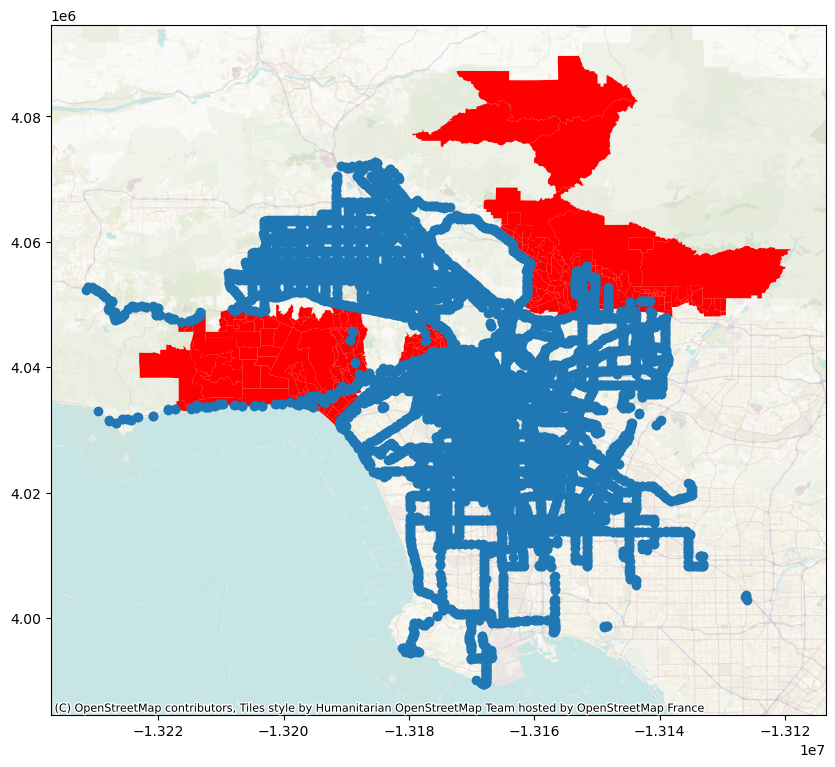

In [10]:
import matplotlib.pyplot as plt
import contextily as ctx
fig, ax = plt.subplots(figsize=(10,10))
evac_zones.to_crs('EPSG:3857').plot(color='r',ax=ax)
metrostopsGdf.to_crs('EPSG:3857').plot(ax=ax)
ctx.add_basemap(ax=ax, alpha=0.5, zoom=13)

In [11]:
firejoin = gpd.sjoin(metrostopsGdf.to_crs('EPSG:2229'),evac_zones.to_crs('EPSG:2229'))
firejoin.head()

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,stop_url,location_type,parent_station,tpis_name,...,country_ab,state_abbr,county_abb,city_abbr,zone_seque,city_zone_,incident_n,most_extre,Shape__Are,Shape__Len
25,65,65,Agoura / Lost Hills,NaN,34.139410,-118.708608,NaN,NaN,NaN,NaN,...,US,CA,XLA,CAL,C405,CAL-C405,PALISADES,Evacuation Warning,6.982940e+07,45358.932757
35,86,86,Allen / Washington,NaN,34.169413,-118.112873,NaN,NaN,NaN,NaN,...,US,CA,XLA,LAC,E179,LAC-E179,EATON,Evacuation Order,1.041092e+07,14499.986561
329,546,546,Cahuenga / Franklin,NaN,34.105321,-118.330615,NaN,NaN,NaN,NaN,...,US,CA,XLA,LOS,Q0841,LOS-Q0841,SUNSET,Evacuation Order,1.140769e+07,17947.998267
330,548,548,Cahuenga / Universal Studios,NaN,34.132332,-118.353024,NaN,NaN,NaN,NaN,...,US,CA,XLA,LOS,Q0521,LOS-Q0521,SUNSET,Evacuation Warning,1.634804e+07,22221.237524
331,549,549,Cahuenga / Wright,NaN,34.119376,-118.339502,NaN,NaN,NaN,NaN,...,US,CA,XLA,LOS,Q0842,LOS-Q0842,SUNSET,Evacuation Order,4.099892e+06,11836.673343


In [12]:
firejoin.describe()

,stop_id,stop_code,stop_desc,stop_lat,stop_lon,stop_url,location_type,parent_station,tpis_name,index_right,Shape__Are,Shape__Len
count,4.890000e+02,4.890000e+02,0.0,489.000000,489.000000,0.0,0.0,0.0,0.0,489.000000,4.890000e+02,489.000000
mean,6.427566e+05,6.427566e+05,NaN,34.121759,-118.340271,NaN,NaN,NaN,NaN,191.010225,2.340616e+07,24279.574696
std,6.383032e+06,6.383032e+06,NaN,0.056687,0.189611,NaN,NaN,NaN,NaN,76.584103,2.975570e+07,13205.111976
min,6.500000e+01,6.500000e+01,NaN,34.020667,-118.724725,NaN,NaN,NaN,NaN,14.000000,2.020273e+06,6437.156375
25%,3.756000e+03,3.756000e+03,NaN,34.061592,-118.495549,NaN,NaN,NaN,NaN,127.000000,1.159255e+07,17800.563643
50%,9.268000e+03,9.268000e+03,NaN,34.128667,-118.338710,NaN,NaN,NaN,NaN,202.000000,1.596156e+07,20505.394864
75%,1.281300e+04,1.281300e+04,NaN,34.168627,-118.150631,NaN,NaN,NaN,NaN,245.000000,2.320619e+07,23970.859609
max,7.050000e+07,7.050000e+07,NaN,34.240423,-118.052819,NaN,NaN,NaN,NaN,314.000000,3.835183e+08,118047.412906


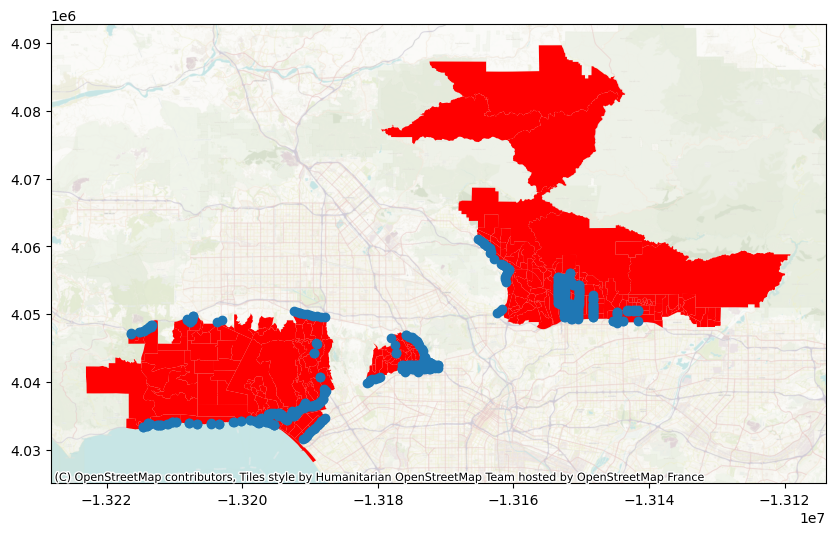

In [13]:
import matplotlib.pyplot as plt
import contextily as ctx
fig, ax = plt.subplots(figsize=(10,10))
evac_zones.to_crs('EPSG:3857').plot(color='r',ax=ax)
firejoin.to_crs('EPSG:3857').plot(ax=ax)
ctx.add_basemap(ax=ax, alpha=0.5, zoom=13)

In [16]:
import json
import pandas as pd
import requests
import time
#time.sleep(#seconds)
APIkey = '6158d4c78ee387fc03f9d7b81ce35660'  # the key posted on BART's website
agencyKey = 'lametro'
requestString = 'https://api.goswift.ly/real-time/lametro/gtfs-rt-trip-updates'.format(agencyKey,APIkey)
r = requests.get(requestString)
d = json.loads(r.text)
#df = pd.DataFrame(etd[0]['estimate'])
#df

In [17]:
print(d)

{'errorCode': 401, 'errorMessage': 'Missing Authorization Header'}


In [4]:
walk_score = pd.read_csv('Data/Walk_Transit_Bike Score - Sheet1.csv')

In [5]:
walk_score.head()

,City,State,Walk Score,Transit Score,Bike Score,Population
0,New York,NY,88.0,88.6,69.3,"8,175,133"
1,Los Angeles,CA,68.6,52.9,58.7,"3,792,621"
2,Chicago,IL,77.2,65,72.2,"2,695,598"
3,Houston,TX,47.5,36.2,48.6,"2,099,451"
4,Philadelphia,PA,74.8,67,66.7,"1,526,006"
